In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
import xgboost as xgb

/home/goyal/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv('train_DaEJRFg.csv')
test_data = pd.read_csv('test_TQDFDgg.csv')

In [3]:
train_data.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [4]:
var = ['incident_tehsil', 'cause_of_emergency', 'roadway_feature', 'road_type']
for var in var:
    print (var)
    print train_data[var].value_counts()

incident_tehsil
Raipur        4794
Doiwala       3185
Sahaspur      2320
Vikasnagar     887
Dehradun       315
Chakrata       199
Kalsi           77
Name: incident_tehsil, dtype: int64
cause_of_emergency
2 Wheeler accidents                                                         7127
MVC - Pedestrian (Run Over/Hit & Run)                                       1198
Multiple Vehicular Incident                                                 1196
Vehicle role over/Skid                                                       807
Auto (3 Wheeler accidents)                                                   367
Vehicle -Fall From Height etc.                                               341
MCI                                                                          168
MVC-Fixed object (Divider)                                                   147
Railroad Train/Other Object                                                  138
MVC-Thrown off from Vehicle                                        

In [5]:
train_data.dtypes

victim_id                     object
incident_time                 object
incident_date                 object
incident_location             object
incident_tehsil               object
cause_of_emergency            object
base_to_scene_distance         int64
scene_to_hospital_distance     int64
roadway_feature               object
road_type                     object
surrounding_area              object
criticality                    int64
dtype: object

In [6]:
list(train_data.columns.values)

['victim_id',
 'incident_time',
 'incident_date',
 'incident_location',
 'incident_tehsil',
 'cause_of_emergency',
 'base_to_scene_distance',
 'scene_to_hospital_distance',
 'roadway_feature',
 'road_type',
 'surrounding_area',
 'criticality']

In [7]:
for x in list(train_data.columns.values):
    print "Null values in " + str(x) + " are :" + str(sum(train_data[x].isnull()))

Null values in victim_id are :0
Null values in incident_time are :0
Null values in incident_date are :0
Null values in incident_location are :307
Null values in incident_tehsil are :0
Null values in cause_of_emergency are :0
Null values in base_to_scene_distance are :0
Null values in scene_to_hospital_distance are :0
Null values in roadway_feature are :0
Null values in road_type are :0
Null values in surrounding_area are :0
Null values in criticality are :0


In [8]:
for col in list(train_data.columns.values):
    print "Unique values in " + str(col) + " are :" + str(len(train_data[col].unique()))

Unique values in victim_id are :11777
Unique values in incident_time are :10752
Unique values in incident_date are :2107
Unique values in incident_location are :5522
Unique values in incident_tehsil are :7
Unique values in cause_of_emergency are :14
Unique values in base_to_scene_distance are :57
Unique values in scene_to_hospital_distance are :86
Unique values in roadway_feature are :5
Unique values in road_type are :2
Unique values in surrounding_area are :6
Unique values in criticality are :2


In [9]:
train_data.corr()

,base_to_scene_distance,scene_to_hospital_distance,criticality
base_to_scene_distance,1.000000,0.418133,0.059941
scene_to_hospital_distance,0.418133,1.000000,0.202170
criticality,0.059941,0.202170,1.000000


In [10]:
data = train_data[train_data['criticality']==1]
print len(data)
print len((data['incident_location'].unique()))

522
410


In [11]:
train_data.describe(include='all')

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
count,11777,11777,11777,11470,11777,11777,11777.000000,11777.000000,11777,11777,11777,11777.000000
unique,11777,10752,2107,5521,7,14,NaN,NaN,5,2,6,NaN
top,VIC20140001197151,19:09:39,20-03-2011,Dehradun,Raipur,2 Wheeler accidents,NaN,NaN,CUR,HIW,AGL,NaN
freq,1,5,25,327,4794,7127,NaN,NaN,4769,7840,4847,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.819648,7.628598,NaN,NaN,NaN,0.044324
std,NaN,NaN,NaN,NaN,NaN,NaN,5.920448,8.993419,NaN,NaN,NaN,0.205822
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,10.000000,NaN,NaN,NaN,0.000000


In [12]:
train_data['hour'] = train_data['incident_time'].str[:2].astype(int)
train_data['minute'] = train_data['incident_time'].str[3:5].astype(int)
train_data['second'] = train_data['incident_time'].str[6:].astype(int)

test_data['hour'] = test_data['incident_time'].str[:2].astype(int)
test_data['minute'] = test_data['incident_time'].str[3:5].astype(int)
test_data['second'] = test_data['incident_time'].str[6:].astype(int)

In [13]:
train_data['date'] = train_data['incident_date'].str[:2].astype(int)
train_data['month'] = train_data['incident_date'].str[3:5].astype(int)
train_data['year'] = train_data['incident_date'].str[6:].astype(int)

test_data['date'] = test_data['incident_date'].str[:2].astype(int)
test_data['month'] = test_data['incident_date'].str[3:5].astype(int)
test_data['year'] = test_data['incident_date'].str[6:].astype(int)

In [14]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("ISBT raipur dehradun") 
print(location.address)
print((location.latitude, location.longitude))

ISBT Road, Dehradun, Dehra Dūn, Uttarakhand, 248001, India
(30.2895043, 78.0383102)


In [15]:
train_data['surrounding_area'].unique()

array(['FOR', 'AGL', 'HOSP', 'HIL', 'MAR', 'COL'], dtype=object)

In [16]:
train_data.incident_tehsil.replace(['Raipur', 'Sahaspur', 'Dehradun', 'Doiwala', 'Vikasnagar',
       'Chakrata', 'Kalsi'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
train_data.cause_of_emergency.replace(['Multiple Vehicular Incident', '2 Wheeler accidents',
       'Non motorised vehicle accidents(Bullock cart,Bicycle,Rickshaw,Push cart)',
       'MVC - Pedestrian (Run Over/Hit & Run)', 'Vehicle role over/Skid',
       'Auto (3 Wheeler accidents)', 'MVC-Thrown off from Vehicle',
       'MVC-Fixed object (Divider)', 'MCI',
       'Vehicle -Fall From Height etc.', 'Railroad Train/Other Object',
       'MVC-Non traffic inside a parked vehicle/Skidding', 'MVC-MV',
       'Extrication>20mts'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace=True)
train_data.road_type.replace(['HIW', 'LOC'], [1, 2], inplace=True)
train_data.roadway_feature.replace(['CUR', 'INT', 'SLP', 'UNK', 'STR'], [1, 2, 3, 4, 5], inplace=True)
train_data.surrounding_area.replace(['FOR', 'AGL', 'HOSP', 'HIL', 'MAR', 'COL'], [1, 2, 3, 4, 5, 6], inplace=True)

In [17]:
test_data.incident_tehsil.replace(['Raipur', 'Sahaspur', 'Dehradun', 'Doiwala', 'Vikasnagar',
       'Chakrata', 'Kalsi'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
test_data.cause_of_emergency.replace(['Multiple Vehicular Incident', '2 Wheeler accidents',
       'Non motorised vehicle accidents(Bullock cart,Bicycle,Rickshaw,Push cart)',
       'MVC - Pedestrian (Run Over/Hit & Run)', 'Vehicle role over/Skid',
       'Auto (3 Wheeler accidents)', 'MVC-Thrown off from Vehicle',
       'MVC-Fixed object (Divider)', 'MCI',
       'Vehicle -Fall From Height etc.', 'Railroad Train/Other Object',
       'MVC-Non traffic inside a parked vehicle/Skidding', 'MVC-MV',
       'Extrication>20mts'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace=True)
test_data.road_type.replace(['HIW', 'LOC'], [1, 2], inplace=True)
test_data.roadway_feature.replace(['CUR', 'INT', 'SLP', 'UNK', 'STR'], [1, 2, 3, 4, 5], inplace=True)
test_data.surrounding_area.replace(['FOR', 'AGL', 'HOSP', 'HIL', 'MAR', 'COL'], [1, 2, 3, 4, 5, 6], inplace=True)

In [18]:
train_data['Date']=pd.to_datetime((train_data.year*10000+train_data.month*100+train_data.date).apply(str),format='%Y%m%d')

test_data['Date']=pd.to_datetime((test_data.year*10000+test_data.month*100+test_data.date).apply(str),format='%Y%m%d')

In [19]:
train_data['weekday'] = train_data['Date'].dt.dayofweek
test_data['weekday'] = test_data['Date'].dt.dayofweek

In [20]:
train_data['season'] = train_data['month']
test_data['season'] = test_data['month']

In [21]:
train_data['season']=train_data['season'].replace([11,12,1,2], 1)
train_data['season']=train_data['season'].replace([3,4,5,6], 2)
train_data['season']=train_data['season'].replace([7,8,9,10], 3)

test_data['season']=test_data['season'].replace([11,12,1,2], 1)
test_data['season']=test_data['season'].replace([3,4,5,6], 2)
test_data['season']=test_data['season'].replace([7,8,9,10], 3)

In [22]:
train_data['hour_bin'] = train_data['hour']
test_data['hour_bin'] = test_data['hour']

In [23]:
train_data['hour_bin']=train_data['hour_bin'].replace([0,1,2,3,4,5], 1)
train_data['hour_bin']=train_data['hour_bin'].replace([6,7,8,9,10,11], 2)
train_data['hour_bin']=train_data['hour_bin'].replace([12,13,14,15,16,17], 3)
train_data['hour_bin']=train_data['hour_bin'].replace([18,19,20,11,22,23], 4)

test_data['hour_bin']=test_data['hour_bin'].replace([0,1,2,3,4,5], 1)
test_data['hour_bin']=test_data['hour_bin'].replace([6,7,8,9,10,11], 2)
test_data['hour_bin']=test_data['hour_bin'].replace([12,13,14,15,16,17], 3)
test_data['hour_bin']=test_data['hour_bin'].replace([18,19,20,11,22,23], 4)

In [24]:
train_data.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,hour,minute,second,date,month,year,Date,weekday,season,hour_bin
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,1,1,13,12,1,1,1,0,22,23,19,7,11,2012,2012-11-07,2,1,4
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,1,2,1,5,1,1,2,0,20,23,9,2,11,2011,2011-11-02,2,1,4
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,1,3,2,2,2,2,3,0,20,37,15,25,7,2009,2009-07-25,5,3,4
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,1,2,8,4,1,1,4,0,15,20,22,19,5,2012,2012-05-19,5,2,3
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,2,2,1,26,1,1,2,0,16,22,17,12,6,2010,2010-06-12,5,2,3


In [25]:
test_data.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,hour,minute,second,date,month,year,Date,weekday,season,hour_bin
0,VIC20100001032706,15:46:12,19-05-2010,Chc Sahaspur,2,4,23,27,2,2,5,15,46,12,19,5,2010,2010-05-19,2,2,3
1,VIC20120000441519,16:55:28,18-03-2012,Doiwala Ambulance,4,1,5,21,1,1,2,16,55,28,18,3,2012,2012-03-18,6,2,3
2,VIC20130000014119,18:49:35,04-01-2013,Race Course Chowk,1,1,3,1,1,1,2,18,49,35,4,1,2013,2013-01-04,4,1,4
3,VIC20140000614145,16:22:55,31-05-2014,Selaqui,2,1,18,14,4,2,2,16,22,55,31,5,2014,2014-05-31,5,2,3
4,VIC20090002298916,15:35:15,08-12-2009,"Ambari Mode,Dakpather",5,2,6,10,2,2,5,15,35,15,8,12,2009,2009-12-08,1,1,3


In [26]:
X = train_data.drop(['victim_id','incident_time','incident_date','incident_location','criticality','Date', 'second', 'minute', 'hour', 'month'] ,axis=1)
Y = train_data['criticality']

In [27]:
X_test = test_data.drop(['victim_id','incident_time','incident_date','incident_location','Date', 'second', 'minute','hour', 'month'], axis=1)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.20)

In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=1000,
                   max_depth=1,
                   min_child_weight=11,
                   learning_rate=0.1,
                   subsample=0.75,
                   colsample_bytree=0.9,
                   gamma=0.0,
                   objective='binary:logistic',
                   nthread=4,
                   scale_pos_weight=1,
                   seed=7
                  )

xgb_model.fit(x_train, y_train)

pred1 = xgb_model.predict(x_train)
pred2 = xgb_model.predict(x_test)

/home/goyal/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/goyal/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
predict_prob = xgb_model.predict_proba(X_test)

In [31]:
z = predict_prob[:, 1]

In [32]:
submission = pd.DataFrame(test_data['victim_id'])
submission['criticality'] = z

In [33]:
submission.head()

,victim_id,criticality
0,VIC20100001032706,0.079783
1,VIC20120000441519,0.091042
2,VIC20130000014119,0.024410
3,VIC20140000614145,0.048332
4,VIC20090002298916,0.085032


In [34]:
submission.to_csv('alpha_omega_submission.csv', index=False)

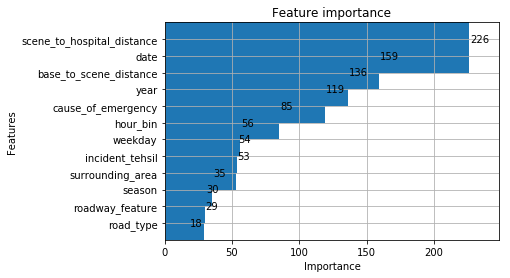

In [35]:
xgb.plot_importance(xgb_model, height=4, xlabel='Importance', ylabel='Features')